In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
STX_df= pd.read_csv(r'C:\Users\sagni\Desktop\ASSIGNMENT1 SNT\STX.csv')
WD_df = pd.read_csv(r'C:\Users\sagni\Desktop\ASSIGNMENT1 SNT\WD.csv')
UL_df = pd.read_csv(r'C:\Users\sagni\Desktop\ASSIGNMENT1 SNT\UL.csv')

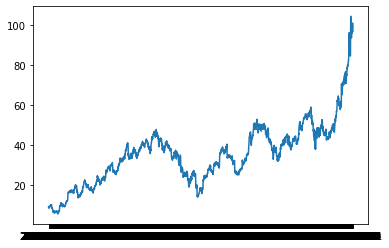

In [3]:
plt.plot(STX_df['Date'],STX_df['Adj Close'])

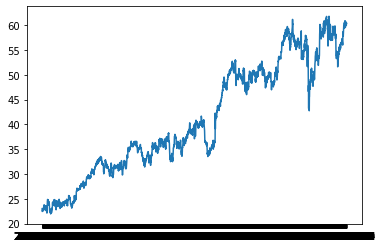

In [4]:
plt.plot(UL_df['Date'],UL_df['Adj Close'])

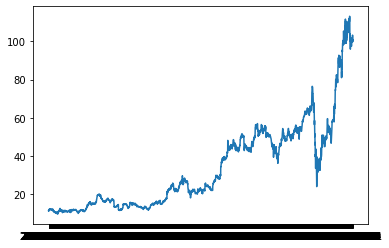

In [5]:
plt.plot(WD_df['Date'],WD_df['Adj Close'])

In [6]:
def drop_date(df):
    df.drop(['Date'],axis=1,inplace=True)

In [7]:
STX_df1 = drop_date(STX_df)
WD_df1 = drop_date(WD_df)
UL_df1 = drop_date(UL_df)

In [8]:
def transform_into_x_and_y(df):
    X = df.drop(['Adj Close'],axis= 1)
    y = df['Adj Close']
    return X,y

In [9]:
STX_X,STX_y = transform_into_x_and_y(STX_df)
WD_X,WD_y = transform_into_x_and_y(WD_df)
UL_X,UL_y = transform_into_x_and_y(UL_df)

In [10]:
len(UL_X)

2516

In [11]:
def split_data(X,y,percent):
    xtrain = X[:int(X.shape[0]*percent)]
    xtest = X[int(X.shape[0]*percent):]
    ytrain = y[:int(X.shape[0]*percent)]

    ytest = y[int(X.shape[0]*percent):]
    return xtrain,xtest,ytrain,ytest

In [12]:
STX_xtrain,STX_xtest,STX_ytrain,STX_ytest = split_data(STX_X,STX_y,0.8)

In [13]:
UL_xtrain,UL_xtest,UL_ytrain,UL_ytest = split_data(UL_X,UL_y,0.8)

In [14]:
WD_xtrain,WD_xtest,WD_ytrain,WD_ytest = split_data(WD_X,WD_y,0.8)

# LINEAR REGRESSION

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [16]:
def pipeline_for_linear_model(xtrain,ytrain,model):
    pipe = Pipeline(steps=[('sscaler',StandardScaler()),('model',model)])
    df_pipe = pipe.fit(xtrain,ytrain)
    return df_pipe

In [17]:
STX_pipe_linear = pipeline_for_linear_model(STX_xtrain,STX_ytrain,LinearRegression())
WD_pipe_linear = pipeline_for_linear_model(WD_xtrain,WD_ytrain,LinearRegression())
UL_pipe_linear = pipeline_for_linear_model(UL_xtrain,UL_ytrain,LinearRegression())

# MAE,MSE,RMSE

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [19]:
def errors(df_pipe,xtest,ytest):
    ypredict = df_pipe.predict(xtest)
    print('MAE score is ',mean_absolute_error(ytest,ypredict))
    print('MSE score is ',mean_squared_error(ytest,ypredict))
    print('RMSE score is ',np.sqrt(mean_squared_error(ytest,ypredict)))
    print('R2 score is ',df_pipe.score(xtest,ytest))

In [20]:
print('Error in model of STX')
errors(STX_pipe_linear,STX_xtest,STX_ytest)

Error in model of STX
MAE score is  11.528350111242078
MSE score is  148.9064238411398
RMSE score is  12.202721984915488
R2 score is  0.2828367500537138


In [21]:
print('Error in model of WD')
errors(WD_pipe_linear,WD_xtest,WD_ytest)

Error in model of WD
MAE score is  2.8895840693257115
MSE score is  11.317834400778718
RMSE score is  3.3641989240796564
R2 score is  0.9753464786691747


In [22]:
print('Error in model of UL')
errors(UL_pipe_linear,UL_xtest,UL_ytest)

Error in model of UL
MAE score is  2.9199256987021527
MSE score is  10.188500680614869
RMSE score is  3.1919430885613966
R2 score is  0.1452917081403745


# SVC

In [23]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [24]:
STX_pipe_svr = pipeline_for_linear_model(STX_xtrain,STX_ytrain,SVR())
WD_pipe_svr = pipeline_for_linear_model(WD_xtrain,WD_ytrain,SVR())
UL_pipe_svr = pipeline_for_linear_model(UL_xtrain,UL_ytrain,SVR())

In [25]:
errors(STX_pipe_svr,STX_xtest,STX_ytest)

MAE score is  18.17262898443217
MSE score is  602.6524340631076
RMSE score is  24.54898030597417
R2 score is  -1.9024951849077323


In [26]:
errors(WD_pipe_svr,WD_xtest,WD_ytest)

MAE score is  22.46214387960147
MSE score is  1300.5140874572921
RMSE score is  36.0626411603101
R2 score is  -1.8328963528536146


In [27]:
errors(UL_pipe_svr,UL_xtest,UL_ytest)

MAE score is  5.028549151777784
MSE score is  28.726384871111936
RMSE score is  5.359700072868997
R2 score is  -1.4098422441297354


# DECISION TREE REGRESSOR

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
param_grid1 = {'max_depth':[50,100,150,200,250],'max_leaf_nodes':[10,20,30,40,50]}

In [30]:
def model_with_grid(pipe,xtrain,ytrain,param_grid1):
    grid = GridSearchCV(pipe,param_grid=param_grid1,cv=5)
    grid.fit(xtrain,ytrain)
    return grid

In [31]:
STX_grid_dtr = model_with_grid(DecisionTreeRegressor(random_state=0),STX_xtrain,STX_ytrain,param_grid1)
errors(STX_grid_dtr,STX_xtest,STX_ytest)

MAE score is  15.041084432676286
MSE score is  369.4805479433022
RMSE score is  19.22187680595478
R2 score is  -0.7794925411521787


In [32]:
UL_grid_dtr = model_with_grid(DecisionTreeRegressor(random_state=0),UL_xtrain,UL_ytrain,param_grid1)
errors(UL_grid_dtr,UL_xtest,UL_ytest)

MAE score is  3.145473036645076
MSE score is  12.753456733023581
RMSE score is  3.5711982209089963
R2 score is  -0.0698811887334918


In [33]:
WD_grid_dtr = model_with_grid(DecisionTreeRegressor(random_state=0),WD_xtrain,WD_ytrain,param_grid1)
errors(WD_grid_dtr,WD_xtest,WD_ytest)

MAE score is  14.49391184077992
MSE score is  520.5952886339173
RMSE score is  22.81655733527557
R2 score is  -0.134007319649454


# ELASTIC NET

In [34]:
from sklearn.linear_model import ElasticNet

In [35]:
grid_elasticnet = {'elastic__alpha':[0.1,0.5,1,5,10],'elastic__l1_ratio' : [0.1,0.25,0.5,0.75,0.9]}

In [36]:
STX_elastic = model_with_grid(Pipeline(steps=[('scaler',StandardScaler()),('elastic',ElasticNet())]),STX_xtrain,STX_ytrain,grid_elasticnet)
errors(STX_elastic,STX_xtest,STX_ytest)

MAE score is  11.883321414763529
MSE score is  159.24090501722085
RMSE score is  12.619069102640688
R2 score is  0.23306381269102527


In [37]:
UL_elastic = model_with_grid(Pipeline(steps=[('scaler',StandardScaler()),('elastic',ElasticNet())]),UL_xtrain,UL_ytrain,grid_elasticnet)
errors(UL_elastic,UL_xtest,UL_ytest)

MAE score is  3.356898041962685
MSE score is  13.015227469735212
RMSE score is  3.607662327565485
R2 score is  -0.09184100659553751


In [38]:
WD_elastic = model_with_grid(Pipeline(steps=[('scaler',StandardScaler()),('elastic',ElasticNet())]),WD_xtrain,WD_ytrain,grid_elasticnet)
errors(WD_elastic,WD_xtest,WD_ytest)

MAE score is  3.27311179022054
MSE score is  14.810461662819556
RMSE score is  3.848436262018582
R2 score is  0.9677385249161651


# K-NEAREST NEIGHBOUR REGRESSOR

In [39]:
from sklearn.neighbors import KNeighborsRegressor

In [40]:
grid_neighbor = {'n_neighbors':[3,5,7,10,12,15]}

In [41]:
STX_Kneighbors = model_with_grid(KNeighborsRegressor(),STX_xtrain,STX_ytrain,grid_neighbor)
errors(STX_Kneighbors,STX_xtest,STX_ytest)

MAE score is  19.189064109391534
MSE score is  610.0725652833901
RMSE score is  24.69964706799249
R2 score is  -1.9382320274407503


In [42]:
UL_Kneighbors = model_with_grid(KNeighborsRegressor(),UL_xtrain,UL_ytrain,grid_neighbor)
errors(UL_Kneighbors,UL_xtest,UL_ytest)

MAE score is  19.13354529206349
MSE score is  384.2235780334096
RMSE score is  19.60162182150777
R2 score is  -31.23232626346651


In [43]:
WD_Kneighbors = model_with_grid(KNeighborsRegressor(),WD_xtrain,WD_ytrain,grid_neighbor)
errors(WD_Kneighbors,WD_xtest,UL_ytest)

MAE score is  25.762507722718254
MSE score is  715.9494532082998
RMSE score is  26.757231792700452
R2 score is  -59.0606461531462
